In [5]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

### Talkapalooza - TL BL SS 23

# Data conversion:

Since FastAudio keeps on running into errors (locked in versions of packages being incomplete/erroneous), I will convert audio into spectrograms manually.

## Imports:

Librosa to load and visalise audio fils. 

In [7]:
import librosa
import librosa.display

IPython to play audio

In [8]:
import IPython.display as ipd

## Load audio data:

Reminder:

In [29]:
src = "../.source/labelled_data/"

audio_data = os.listdir(src)
print("Total of recordings in audio folder:" ,len(audio_data))

Total of recordings in audio folder: 1205


### Loading single audio file:

In [31]:
x, sr = librosa.load(src+audio_data[2], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(53979,) 44100


Word: gas station


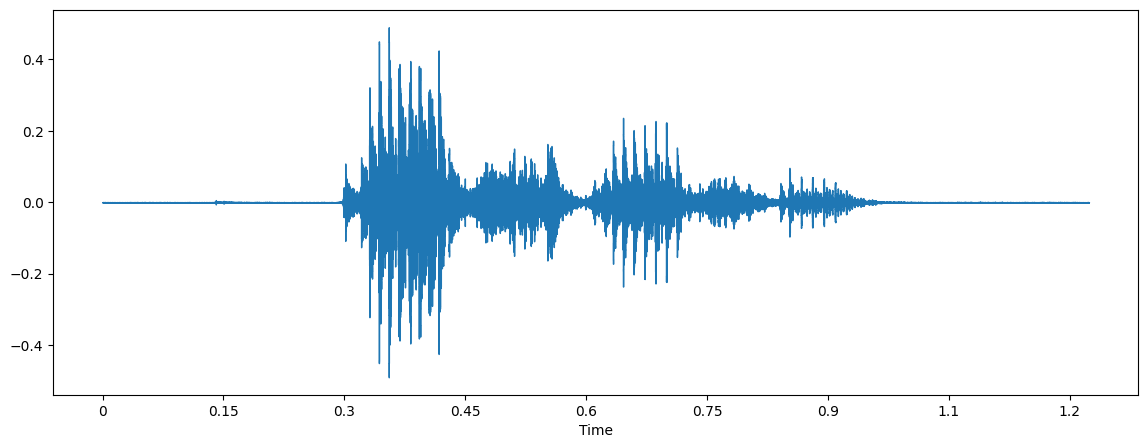

In [36]:
plt.figure(figsize=(14, 5))
print("Word:", audio_data[2].split('--')[0])
librosa.display.waveshow(x, sr=sr)

## Convert waveform to spectrogram:

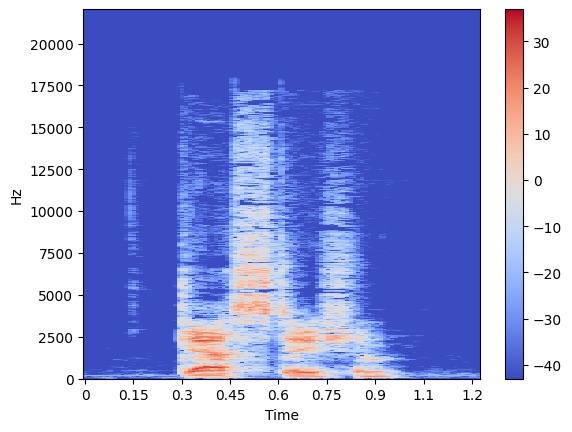

In [39]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure()
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

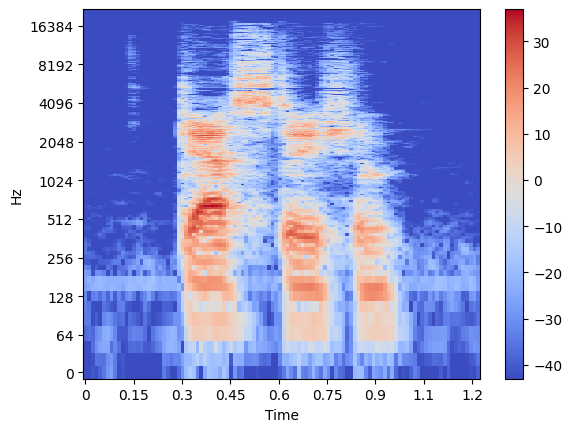

In [40]:
plt.figure()
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Further plans:

Same size.

Save files to .png using same naming convention as audio files.

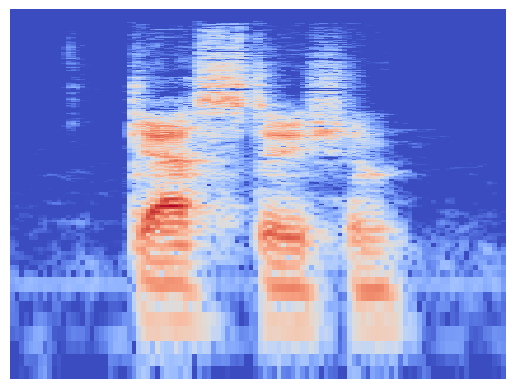

In [57]:
plt.figure(frameon=False)
plt.axis('off')
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')

plt.savefig('../output/spec', dpi='figure', bbox_inches='tight',transparent=True, pad_inches=0)

In [85]:
def convert_to_spectrogram(af, dst):   
    x, sr = librosa.load(af, sr=44100)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))

    plt.figure(frameon=False)
    plt.axis('off')
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log', cmap='magma')

    fname = af.split('/')[-1][:-4]
    dst = dst + "/" + fname
    # print(dst)

    plt.savefig(dst, dpi='figure', bbox_inches='tight',transparent=True, pad_inches=0)
    plt.close()
    

In [86]:
dst = '../.source/labelled_images'

In [87]:
for af in audio_data:
    convert_to_spectrogram(src + af, dst)

For DL optimised spectrogram representation, see here:
https://stackoverflow.com/questions/56719138/how-can-i-save-a-librosa-spectrogram-plot-as-a-specific-sized-image/57204349#57204349